## Observations and Insights 

In [144]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
import os

# filter for warnings:
import warnings
warnings.filterwarnings('ignore')

# File path for the saved plots
file_path = os.path.join("images","")

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')
merged_df.head()

# Checking the number of mice in the DataFrame.
len(merged_df['Mouse ID'].unique())

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse_df = merged_df.loc[merged_df.duplicated(subset=["Mouse ID","Timepoint"]), "Mouse ID"].unique()
duplicated_mouse_df

# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse = merged_df.loc[merged_df["Mouse ID"] == "g989"]
duplicated_mouse

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df["Mouse ID"].isin(duplicated_mouse_df) == False]
clean_df.head()

# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [145]:
# Generate a summary statistics table of mean, median, 
    #variance, standard deviation, and SEM 
    #of the tumor volume for each regimen

# This method is the most straightforward, 
    #creating multiple series and putting them all together at the end.

In [146]:
# Create a summary table
means = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
medians = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
std = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
means = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
summary_table1 = pd.DataFrame({"Average Tumor Volume (mm3)": means,
                               "Median Tumor Volume (mm3)": medians,
                               "Std. Dev. Tumor Volume (mm3)": std,
                               "Sem Tumor Volume (mm3)": sem,
                               "Variance Tumor Volume (mm3)": variance})
summary_table1

,Average Tumor Volume (mm3),Median Tumor Volume (mm3),Std. Dev. Tumor Volume (mm3),Sem Tumor Volume (mm3),Variance Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346,24.947764
Ceftamin,52.591172,51.776157,6.268188,0.469821,39.290177
Infubinol,52.884795,51.820584,6.567243,0.492236,43.128684
Ketapril,55.235638,53.698743,8.279709,0.603860,68.553577
Naftisol,54.331565,52.509285,8.134708,0.596466,66.173479
Placebo,54.033581,52.288934,7.821003,0.581331,61.168083
Propriva,52.320930,50.446266,6.622085,0.544332,43.852013
Ramicane,40.216745,40.673236,4.846308,0.320955,23.486704
Stelasyn,54.233149,52.431737,7.710419,0.573111,59.450562


## Bar Plots

In [147]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

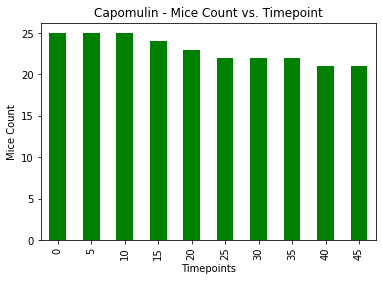

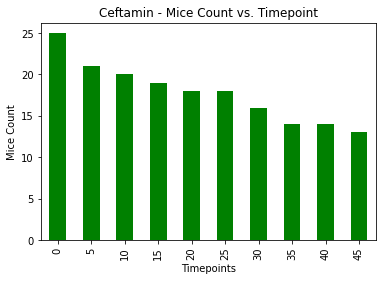

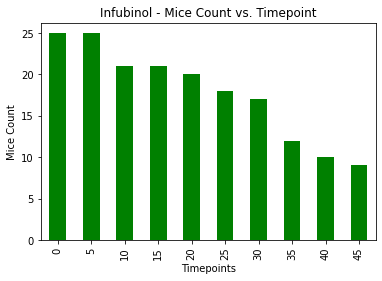

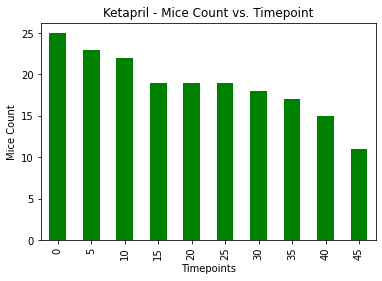

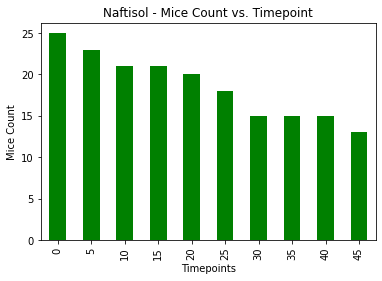

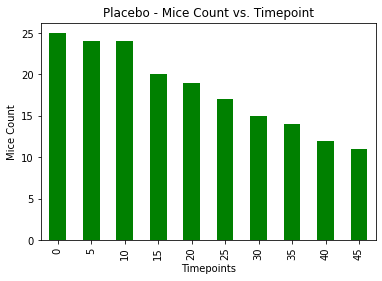

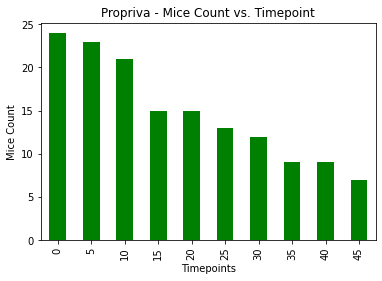

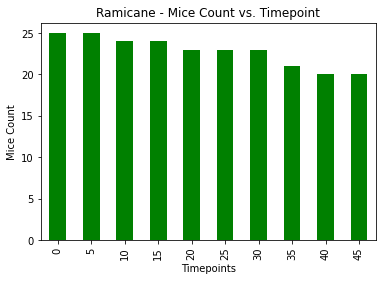

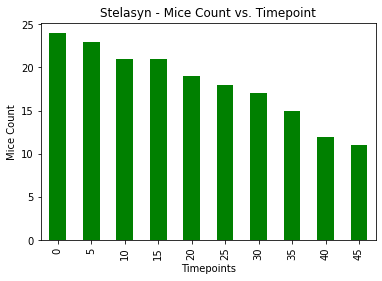

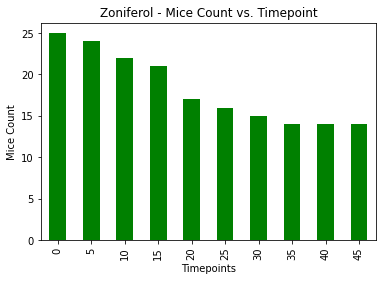

In [148]:
# Create a drug list to iterate over:
drug_list = summary_table1.index.tolist()
for x in range(len(drug_list)):
    drug_name = drug_list[x]
    drug_list[x] = clean_df.loc[clean_df["Drug Regimen"] == drug_list[x]]
    plot_title = f"{drug_name} - Mice Count vs. Timepoint"
    drug_list[x] = drug_list[x][["Mouse ID", "Timepoint"]]
    drug_list[x] = drug_list[x].groupby('Timepoint')
    mouse_id = drug_list[x]['Mouse ID'].count()
    timepoint_barchart = mouse_id.plot(kind='bar', title=plot_title, color='g')
    timepoint_barchart.set_xlabel("Timepoints")
    timepoint_barchart.set_ylabel("Mice Count")
    plt.show()

Capomulin
Ceftamin
Infubinol
Ketapril
Naftisol
Placebo
Propriva
Ramicane
Stelasyn
Zoniferol


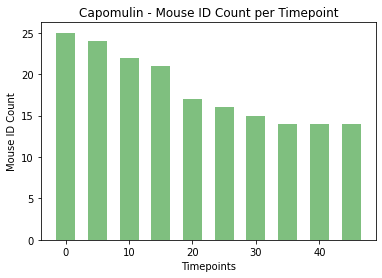

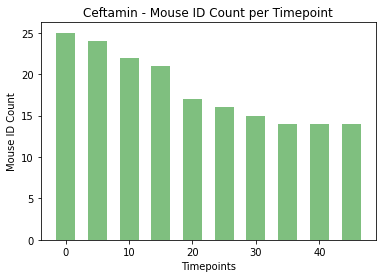

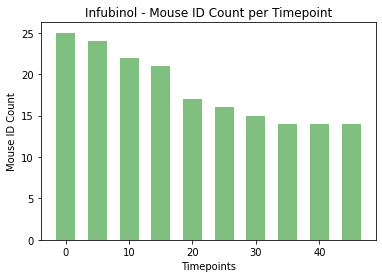

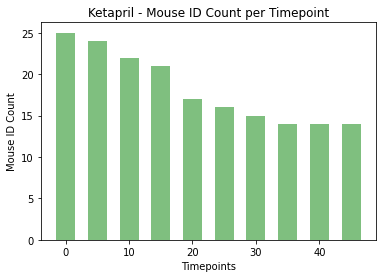

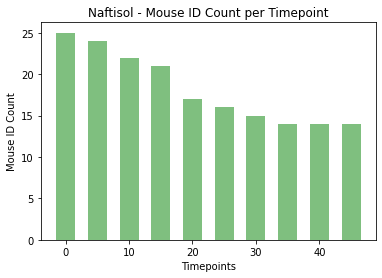

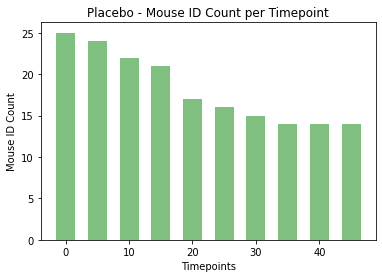

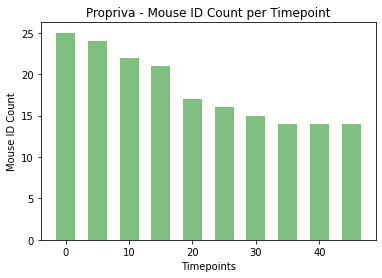

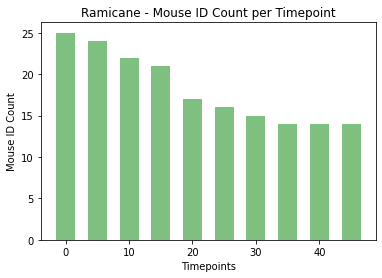

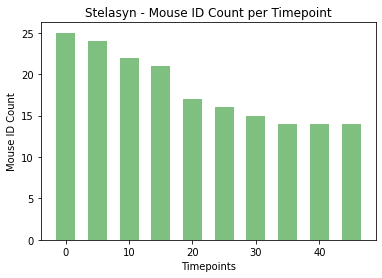

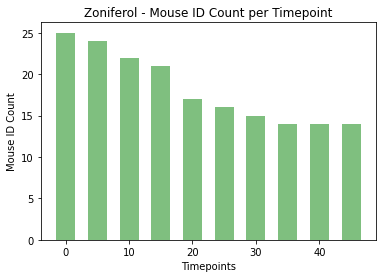

In [149]:
# Same plots using plt.bar
x_axis = [value for value in range(0, 50, 5)]
# Start with 'Capomulin'
drug_list_plt = summary_table1.index.tolist()
drug_name_plt = ""
for x in range(len(drug_list_plt)):
    drug_name_plt = drug_list_plt[x]
    print(drug_name_plt)
    
drug_list_plt = summary_table1.index.tolist()
drug_name_plt = ""
for x in range(len(drug_list)):
    drug_name_plt = drug_list_plt[x]
    #print(drug_name_plt)
    plt.bar(x_axis, mouse_id, color='g', alpha=0.5, width=3, align="center")
    
    #plt.xticks(value for value in range(0, 50, 5))
    plt.title(f"{drug_name_plt} - Mouse ID Count per Timepoint")
    plt.xlabel("Timepoints")
    plt.ylabel("Mouse ID Count")
    plt.savefig(f"{drug_name_plt}_MouseID_Count_per_Timepoint")
    plt.show()

{'Capomulin': 'royalblue', 'Ceftamin': 'darkorange', 'Infubinol': 'green', 'Ketapril': 'red', 'Naftisol': 'lime', 'Placebo': 'blueviolet', 'Propriva': 'pink', 'Ramicane': 'cornflowerblue', 'Stelasyn': 'peru', 'Zoniferol': 'lightseagreen'}


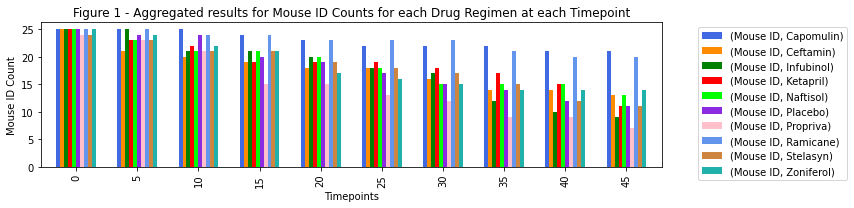

<Figure size 432x288 with 0 Axes>

In [150]:
# Option 3 - aggregate the plots into one:
# Create a grouped_df with two columns:
grouped_gf = clean_df.groupby(['Timepoint','Drug Regimen'])
mice_count = grouped_gf['Timepoint'].count()

# Aggreate the data into one plot:
agg_df = clean_df.groupby(['Drug Regimen','Timepoint']).agg({'Mouse ID':'count'})

# This dictionary is to color the bars in the custom plot based on specific drug.
values = ["royalblue","darkorange","green","red","lime","blueviolet","pink","cornflowerblue","peru","lightseagreen"]
keys = drug_list_plt
color_drug_dict = dict(zip(keys, values))
print(color_drug_dict)

# Plot aggregated data
agg_df.unstack(0).plot(kind="bar",figsize=(12,3), label='_nolegend_', color=values, width=0.65) 
plt.title("Figure 1 - Aggregated results for Mouse ID Counts for each Drug Regimen at each Timepoint")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("Timepoints")
plt.ylabel("Mouse ID Count")
plt.tight_layout()
plt.show()
plt.savefig("agg_df_plot")

#### Change from Markdown to Code to try plotting custom plots
#### Practicing getting a custom plot based on the user input of the Drug Regimen:
drug_user_input = input("What Drug Regimen would you like to look up?")

#### Change from Markdown to Code to try plotting custom plots
#### Note: the color-code will be based on the aggregated plot above.
for x in range(len(drug_list_plt)):
    if drug_user_input == drug_list_plt[x]:
        x_axis = [value for value in range(0, 50, 5)]
        mouse_id = drug_list[x]['Mouse ID'].count()
        color = color_drug_dict.get(drug_list_plt[x], "")
        print()
        plt.bar(x_axis, mouse_id, color=color, width=3, alpha=.75, align="center")
        plt.title(f"{drug_user_input} - Mouse ID Count per Timepoint")
        plt.xlabel("Timepoints")
        plt.ylabel("Mouse ID Count")
        plt.show()
        break
print(x_axis)

                        Timepoint
Drug Regimen Timepoint           
Capomulin    0                  0
             5                125
             10               250
             15               360
             20               460
...                           ...
Zoniferol    25               400
             30               450
             35               490
             40               560
             45               630

[100 rows x 1 columns]


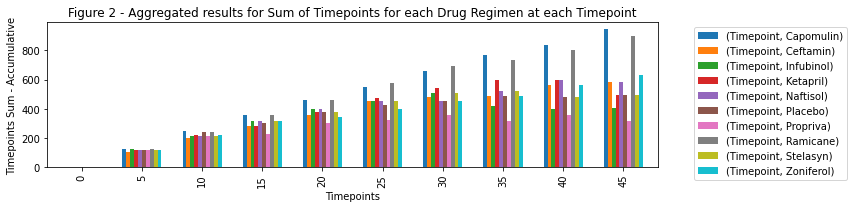

Based on the graph below, the top 4 treatments are: 


<Figure size 432x288 with 0 Axes>

In [151]:
# How to identify the 4 most promising drug regimens from the plot above.
# Attempt 1 - Use sum() function on each of the drug regimen's timepoints
agg_tp_df = clean_df.groupby(['Drug Regimen', 'Timepoint']).agg({'Timepoint':'sum'})
print(agg_tp_df)

# plot with unstack option:
agg_tp_df.unstack(0).plot(kind="bar",figsize=(12,3), label='_nolegend_', width=0.65) 
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title("Figure 2 - Aggregated results for Sum of Timepoints for each Drug Regimen at each Timepoint")
plt.xlabel("Timepoints")
plt.ylabel("Timepoints Sum - Accumulative")
plt.tight_layout()
plt.show()
plt.savefig("agg_tp_df.png")
print(f"Based on the graph below, the top 4 treatments are: ")

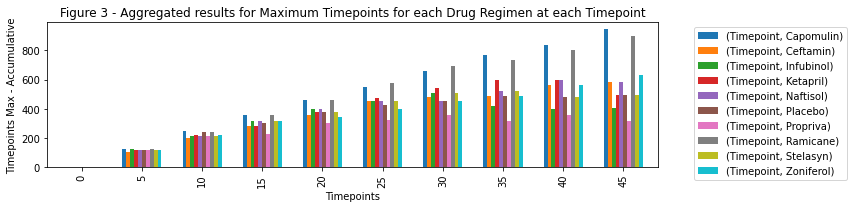

<Figure size 432x288 with 0 Axes>

In [152]:
# Attempt 2 - Use max() function on each of the drug regimen's timepoints
agg_tp_max_df = clean_df.groupby(['Drug Regimen', 'Timepoint']).agg({'Timepoint':'max'})

# plot with unstack option:
agg_tp_df.unstack(0).plot(kind="bar",figsize=(12,3), label='_nolegend_', width=0.65) 
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title("Figure 3 - Aggregated results for Maximum Timepoints for each Drug Regimen at each Timepoint")
plt.xlabel("Timepoints")
plt.ylabel("Timepoints Max - Accumulative")
plt.tight_layout()
plt.show()
plt.savefig("agg_tp_df.png")
#print(f"Based on the graph below, the top 4 treatments are: ")

In [153]:
# Try extracting top 4 Timepoints based on their maximum value:
mean_tumor_volume = clean_df.groupby(['Drug Regimen', 'Timepoint']).mean()
mean_tumor_volume.head()
# mean_df.to_csv("new_df.csv")

Tumor Volume (mm3)  Metastatic Sites  Age_months  \
Drug Regimen Timepoint                                                     
Capomulin    0                   45.000000          0.000000   14.040000   
             5                   44.266086          0.160000   14.040000   
             10                  43.084291          0.320000   14.040000   
             15                  42.064317          0.375000   13.666667   
             20                  40.716325          0.652174   13.304348   

                        Weight (g)  
Drug Regimen Timepoint              
Capomulin    0           20.120000  
             5           20.120000  
             10          20.120000  
             15          20.000000  
             20          19.782609

In [154]:
mean_tumor_volume = mean_tumor_volume['Tumor Volume (mm3)'].reset_index()
mean_tumor_volume.head()

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [155]:
std_tumor_volume = clean_df.groupby(["Drug Regimen","Timepoint"]).std().reset_index()
std_tumor_volume.head()

,Drug Regimen,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
0,Capomulin,0,0.000000,0.000000,7.850053,2.862400
1,Capomulin,5,2.242964,0.374166,7.850053,2.862400
2,Capomulin,10,3.513422,0.627163,7.850053,2.862400
3,Capomulin,15,4.108369,0.646899,7.788881,2.859006
4,Capomulin,20,4.362915,0.775107,7.754382,2.712874


In [156]:
sem_tumor_volume = clean_df.groupby(["Drug Regimen","Timepoint"]).sem().reset_index()
sem_tumor_volume.head()

,Drug Regimen,Timepoint,Age_months,Metastatic Sites,Mouse ID,Sex,Tumor Volume (mm3),Weight (g)
0,Capomulin,0,1.570011,0.000000,NaN,NaN,0.000000,0.572480
1,Capomulin,5,1.570011,0.074833,NaN,NaN,0.448593,0.572480
2,Capomulin,10,1.570011,0.125433,NaN,NaN,0.702684,0.572480
3,Capomulin,15,1.589899,0.132048,NaN,NaN,0.838617,0.583592
4,Capomulin,20,1.616900,0.161621,NaN,NaN,0.909731,0.565673


#### Not able to find the top 4 most promising drug regimens, except visually from the aggregated plots above, which might be misread. Will try again in the Statistics section.

## Pie Plots

In [157]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [158]:
gender_df = clean_df.groupby("Sex")
gender_df.count()
gender_mice_filtered = gender_df["Sex"]
gender_mice_filtered.count()

Sex
Female    922
Male      958
Name: Sex, dtype: int64

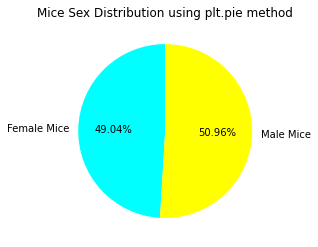

In [159]:
# Generate Pie Plot using plt.pie()
labels = ["Female Mice", "Male Mice"]
sizes = [gender_mice_filtered.count()]
colors = ['cyan', 'yellow']
plt.pie(sizes, labels=labels, autopct="%.2f%%", startangle=90, colors=colors)
plt.title("Mice Sex Distribution using plt.pie method")
plt.savefig("Female and Male Mice Distribution")
plt.show()

In [160]:
# doc_plot = df.plot.pie(y='mass', figsize=(5, 5))
sizes

[Sex
 Female    922
 Male      958
 Name: Sex, dtype: int64]

In [161]:
# Sex distribution using plot.pie()
doc_df = pd.DataFrame({'Counts': [922, 958]},
                  index=['Female', 'Male'])
doc_df

,Counts
Female,922
Male,958


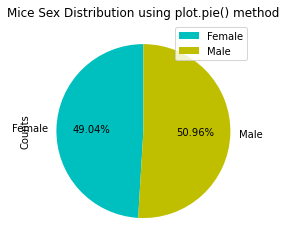

In [162]:
plot_sex = doc_df.plot.pie(y='Counts', title="Mice Sex Distribution using plot.pie() method", labels=['Female','Male'], figsize=(4,4), startangle=90, autopct="%.2f%%", colors=['c','y'])

## Quartiles, Outliers and Boxplots

#### Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#### Based on the analysis above (particularly Figure 1 - Aggregated Results), the four most promising 

#### treatments are: ['Capomulin', 'Ramicane', 'Ketapril', 'Zoniferol']
#### However, this is only visually. Continue the analysis on All Drug Regimens through statistical analysis.

In [163]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [164]:
# Start from re-importing the modules and re-generating clean data
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
import os

# filter for warnings:
import warnings
warnings.filterwarnings('ignore')

# File path for the saved plots
file_path = os.path.join("images","")

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')
merged_df.head()

# Checking the number of mice in the DataFrame.
len(merged_df['Mouse ID'].unique())

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse_df = merged_df.loc[merged_df.duplicated(subset=["Mouse ID","Timepoint"]), "Mouse ID"].unique()
duplicated_mouse_df

# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse = merged_df.loc[merged_df["Mouse ID"] == "g989"]
duplicated_mouse

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df["Mouse ID"].isin(duplicated_mouse_df) == False]
clean_df.head()

# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

In [165]:
# README instructions - Calculate the final tumor volume of each mouse 
    # across four of the most promising treatment regimens: 
        # Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR 
    # and quantitatively determine if there are any potential outliers across all four treatment regimens.

# Select data at last timepoint only. However some effective treatments might not have 45th day of treatment.
final_volume_df = clean_df.loc[clean_df['Timepoint'] == 45]

# Top 4 most promising drugs could be obtained from the average tumor size:
    # (wrong, see correct solution below) Find Top 4 most promising Drug Regimens for treating cancer in mice
grouped_final_volume_df = final_volume_df.groupby('Drug Regimen').mean()
grouped_final_volume_df.head(4)

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Drug Regimen,,,,,
Capomulin,45.0,36.236114,1.476190,12.809524,19.857143
Ceftamin,45.0,64.132421,2.692308,13.538462,27.615385
Infubinol,45.0,65.755562,2.111111,18.555556,26.666667
Ketapril,45.0,70.662958,3.363636,16.272727,27.727273


In [166]:
# Try again to find the top 4 by sorting the data by Tumor volume
sorted_grouped_final_vol_test7_df = final_volume_df.groupby(['Drug Regimen', 'Tumor Volume (mm3)'])
lambda_test7_df = sorted_grouped_final_vol_test7_df.apply(lambda x: x.sort_values('Tumor Volume (mm3)'))
lambda_test7_df.head(100)

Mouse ID  Timepoint  Tumor Volume (mm3)  \
Drug Regimen Tumor Volume (mm3)                                                
Capomulin    23.343598          1849     s185         45           23.343598   
             28.430964          1843     m601         45           28.430964   
             28.484033          1846     x401         45           28.484033   
             31.023923          1889     u364         45           31.023923   
             31.896238          1797     y793         45           31.896238   
...                                       ...        ...                 ...   
Ramicane     36.134852          1828     j989         45           36.134852   
             36.374510          1780     i334         45           36.374510   
             37.225650          1874     r811         45           37.225650   
             37.311236          1844     d251         45           37.311236   
             38.407618          1773     a411         45           38.407618   

                                      Metastatic Sites Drug Regimen     Sex  \
Drug Regimen Tumor Volume (mm3)                                               
Capomulin    23.343598          1849                 1    Capomulin  Female   
             28.430964          1843                 1    Capomulin    Male   
             28.484033          1846                 0    Capomulin  Female   
             31.023923          1889                 3    Capomulin    Male   
             31.896238          1797                 2    Capomulin    Male   
...                                                ...          ...     ...   
Ramicane     36.134852          1828                 1     Ramicane    Male   
             36.374510          1780                 2     Ramicane  Female   
             37.225650          1874                 1     Ramicane    Male   
             37.311236          1844                 2     Ramicane  Female   
             38.407618          1773                 1     Ramicane    Male   

                                      Age_months  Weight (g)  
Drug Regimen Tumor Volume (mm3)                               
Capomulin    23.343598          1849           3          17  
             28.430964          1843          22          17  
             28.484033          1846          16          15  
             31.023923          1889          18          17  
             31.896238          1797          17          17  
...                                          ...         ...  
Ramicane     36.134852          1828           8          19  
             36.374510          1780           8          20  
             37.225650          1874           9          19  
             37.311236          1844           8          19  
             38.407618          1773           3          22  

[100 rows x 8 columns]

In [167]:
# FINAL - Find Top 4 most promising Drug Regimens for treating cancer in mice
sorted_grouped_final_vol_test7a_df = final_volume_df.groupby(['Drug Regimen'])

mean_sorted_grouped_final_vol_test7a_df = sorted_grouped_final_vol_test7a_df.mean()

# FINAL - Find Top 4 most promising Drug Regimens for treating cancer in mice
summary_table2_Top4_MostPromisingDrugs = mean_sorted_grouped_final_vol_test7a_df.sort_values(by='Tumor Volume (mm3)', ascending=True, ignore_index=False)
summary_table2_Top4_MostPromisingDrugs.to_csv("Top4_Most_promising_drug_regimens_df.csv")
summary_table2_Top4_MostPromisingDrugs.head(4)

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Drug Regimen,,,,,
Ramicane,45.0,34.955595,1.250000,10.050000,19.300000
Capomulin,45.0,36.236114,1.476190,12.809524,19.857143
Ceftamin,45.0,64.132421,2.692308,13.538462,27.615385
Infubinol,45.0,65.755562,2.111111,18.555556,26.666667


In [168]:
top4_treatment_regimens = summary_table2_Top4_MostPromisingDrugs.index[:4].to_list()
top4_treatment_regimens

['Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol']

In [169]:
# README Instructions - Calculate the quartiles and IQR and 
    # quantitatively determine if there are any potential outliers across all four treatment regimens.

In [170]:
# Determine if there are any potential outliers in the drug regimen data
quartiles = clean_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
quartiles
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_tumor_volume = clean_df.loc[(clean_df['Tumor Volume (mm3)'] < lower_bound) \
                                        | (clean_df['Tumor Volume (mm3)'] > upper_bound)]
outlier_tumor_volume

The lower quartile of tumor volume is: 45.0
The upper quartile of tumor volume is: 56.32407510749999
The interquartile range of tumor volume is: 11.324075107499993
The the median of tumor volume is: 48.933453655 
Values below 28.01388733875001 could be outliers.
Values above 73.31018776874998 could be outliers.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1605,k403,35,26.546993,1,Ramicane,Male,21,16
1628,k403,40,24.365505,1,Ramicane,Male,21,16
1652,s185,40,25.472143,1,Capomulin,Female,3,17
1690,p189,40,74.106091,4,Ketapril,Male,8,28
1714,l725,40,73.693494,3,Naftisol,Female,8,26
1774,p189,45,75.294936,4,Ketapril,Male,8,28
1775,m650,45,73.901399,4,Ketapril,Male,15,27
1778,o331,45,78.567014,4,Ketapril,Male,24,30
1796,h246,45,74.104086,2,Ketapril,Male,13,30
1803,k382,45,73.715619,4,Ketapril,Male,22,29


In [171]:
grouped_outlier_tumor_volume = outlier_tumor_volume.groupby(['Drug Regimen', 'Mouse ID']).mean().reset_index()
grouped_outlier_tumor_volume.head(30)

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
0,Capomulin,s185,42.5,24.407871,1.0,3.0,17.0
1,Ketapril,h246,45.0,74.104086,2.0,13.0,30.0
2,Ketapril,k382,45.0,73.715619,4.0,22.0,29.0
3,Ketapril,m650,45.0,73.901399,4.0,15.0,27.0
4,Ketapril,o331,45.0,78.567014,4.0,24.0,30.0
5,Ketapril,p189,42.5,74.700513,4.0,8.0,28.0
6,Naftisol,a818,45.0,74.997764,2.0,12.0,28.0
7,Naftisol,l725,42.5,75.181156,3.0,8.0,26.0
8,Naftisol,t724,45.0,75.113288,2.0,2.0,25.0
9,Naftisol,z969,45.0,73.867845,4.0,9.0,30.0


In [172]:
top4_treatment_regimens = summary_table2_Top4_MostPromisingDrugs.index[:4].to_list()
top4_treatment_regimens

['Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol']

In [173]:
outlier_within_top4 = grouped_outlier_tumor_volume['Drug Regimen']
unique_outliers_arr = outlier_within_top4.unique()
unique_outliers_arr

array(['Capomulin', 'Ketapril', 'Naftisol', 'Ramicane', 'Stelasyn',
       'Zoniferol'], dtype=object)

In [174]:
outlier_within_top4 = []
for x in range(len(top4_treatment_regimens)):
    if top4_treatment_regimens[x] in unique_outliers_arr:
        print(x)
        outlier_within_top4.append(top4_treatment_regimens[x])
print(f"There are 2 drug regimens with at least one outlier, among the top 4 most promising drugs identified earlier:\
      {outlier_within_top4}")

0
1
There are 2 drug regimens with at least one outlier, among the top 4 most promising drugs identified earlier:      ['Ramicane', 'Capomulin']


In [175]:
# README Instructions - Using Matplotlib, generate a box and whisker plot of the final tumor volume 
    # for all four treatment regimens 
    # and highlight any potential outliers in the plot by changing their color and style.

In [176]:
# Prepare a new df to work on the statistics part
# NOTE: for a single hard-coded drug at first:
tumor_volume_df = clean_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]
# Grouped by the 'Drug Regimen' and "Timepoint"
grouped_tumor_volume_df = tumor_volume_df.groupby(['Drug Regimen', 'Timepoint'])
# Reset index and sort values in descending order:
sorted_noindex_mean_grouped_tumor_volume_df = grouped_tumor_volume_df.mean().reset_index().sort_values(['Tumor Volume (mm3)'], ascending=False)
# Try to use loc function to extract the data only for Capomulin drug regimen.
drug1_Capomulin = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
# Select only Tumor Volume and Timpoint columns
drug1_Capomulin_filtered = drug1_Capomulin[['Timepoint', 'Tumor Volume (mm3)']]
# Group by Timepoint
drug1_Capomulin_filtered_grouped = drug1_Capomulin_filtered.groupby('Timepoint')
# Mean of group by object and rename the column of the filtered
drug1_Capomulin_filtered_grouped.mean()
drug1_Capomulin_filtered.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume (mm3) Capomulin'})


,Timepoint,Tumor Volume (mm3) Capomulin
0,0,45.000000
226,0,45.000000
227,0,45.000000
228,0,45.000000
229,0,45.000000
...,...,...
1854,45,40.728578
1859,45,38.125164
1878,45,47.685963
1888,45,41.581521


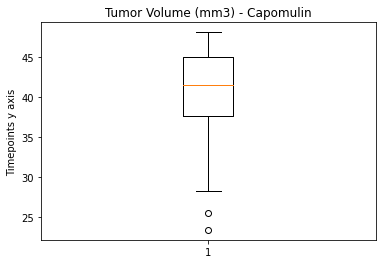

In [177]:
# From Instructions - README:
# Calculate the final tumor volume of each mouse 
    # across four of the most promising treatment regimens: 
        #Capomulin, Ramicane, Infubinol, and Ceftamin. 
        
# Calculate the quartiles and IQR and quantitatively determine 
    # if there are any potential outliers across all four treatment regimens.

# Create a single plot for Capomulin drug:    
tumor_volume = drug1_Capomulin_filtered['Tumor Volume (mm3)']
tumor_volume

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume (mm3) - Capomulin')
ax1.set_ylabel('Timepoints y axis')
ax1.boxplot(tumor_volume)
plt.show()

From the box and whiskers plots below, there are few outliers detected:
 - "Capomulin", "Propriva", "Ramicane", "Stelasyn"
Note: ['Ramicane', 'Capomulin'] are listed in the top 4 most promising drugs, but both have outliers.


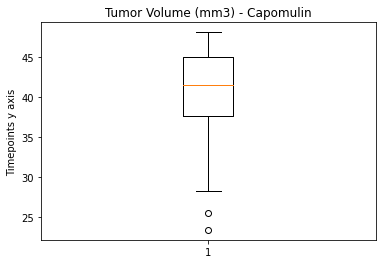

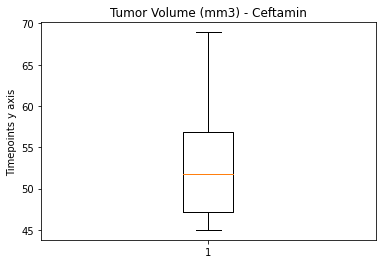

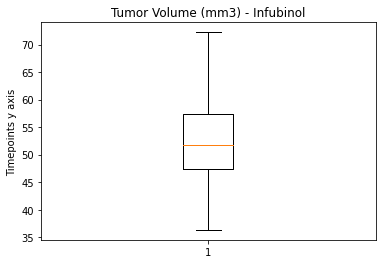

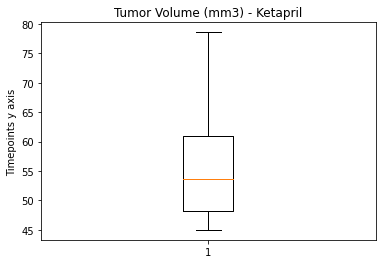

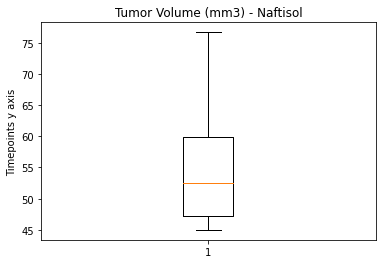

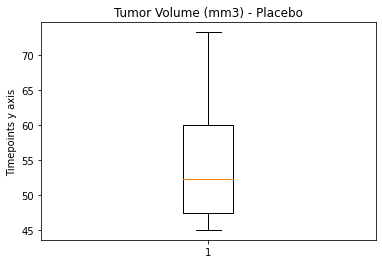

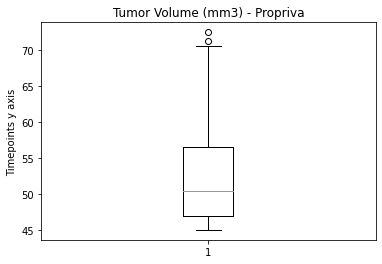

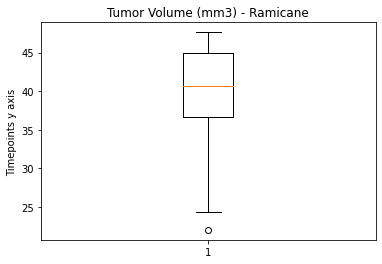

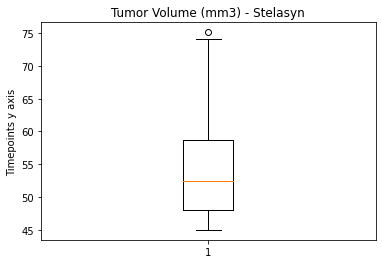

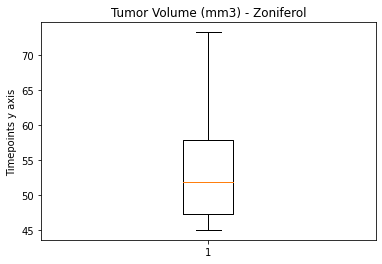

In [178]:
# Create a for loop to iterate over drug list and generate box and whiskers plot for each of the drug regimens. Also .loc clean_df to only use data with Timepoint=45 (at the end of the treatment)
print(f"From the box and whiskers plots below, there are few outliers detected:")
print(f' - "Capomulin", "Propriva", "Ramicane", "Stelasyn"')
print('====================================================================================================')
print(f"Note: {outlier_within_top4} are listed in the top 4 most promising drugs, but both have outliers.")
print('====================================================================================================')

drug_list = summary_table1.index.tolist()
#print(drug_list)
for x in range(len(drug_list)):
    drug_name = drug_list[x]
    #print(drug_name)
    drug_name_df = clean_df.loc[clean_df["Drug Regimen"] == drug_name]
    plot_title = f"{drug_name} - Mice Count vs. Timepoint"
    #print(plot_title)
    filtered_drug_name_df = drug_name_df[['Timepoint', 'Tumor Volume (mm3)']]
#filetered_drug_name_df    
    grouped_filt_drug_name_df = filtered_drug_name_df.groupby('Timepoint')
#grouped_filt_drug_name_df
    mean_grouped_filt_drug_df = grouped_filt_drug_name_df.mean()
#mean_grouped_filt_drug_df    
    renamed_mean_grouped_df = mean_grouped_filt_drug_df.rename(columns={'Tumor Volume (mm3)': (f"Tumor Volume (mm3), {drug_name}")})
#renamed_mean_grouped_df
    # option 2
    tumor_volume = drug_name_df['Tumor Volume (mm3)']
# tumor_volume

    # Create df based one the clean_df using .loc method to extract only the Timepoint == 45, as final tumor volume
    final_tumor_vol_df = drug_name_df.loc[clean_df['Timepoint'] == 45]
    grouped_final_tumor_vol_df = final_tumor_vol_df.groupby('Mouse ID')
#grouped_final_tumor_vol_df    
    mean_grouped_final_drug = grouped_final_tumor_vol_df.mean()
    renamed_mean_grouped_final_df = mean_grouped_final_drug.rename(columns={'Tumor Volume (mm3)': (f"Tumor Volume (mm3), {drug_name}"),
                                                                            'Timepoint': (f"Timepoint, {drug_name}"),
                                                                            'Metastatic Sites': (f"Metastatic Sites, {drug_name}"),
                                                                            'Age_months': (f"Age_months, {drug_name}"),
                                                                            'Weight (g)': (f"Weight (g), {drug_name}")})

#renamed_mean_grouped_final_df
    

    fig1, ax1 = plt.subplots()
    ax1.set_title(f'Tumor Volume (mm3) - {drug_name}')
    ax1.set_ylabel('Timepoints y axis')
    ax1.boxplot(tumor_volume)
    plt.savefig(f"Box_and_Whiskers_plot {drug_name}.png")
    plt.show()

In [179]:
# README Instructions - All four box plots should be within the same figure. 
    # Use this [Matplotlib documentation page]
        # (https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html
        # sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py) 

In [180]:
# test_box_plot for Ramicane ONLY:
print(top4_treatment_regimens)
box_plot_df = clean_df.loc[clean_df['Drug Regimen'] == outlier_within_top4[0]]
box_plot_df1 = box_plot_df['Tumor Volume (mm3)']
#box_plot_df = clean_df['Tumor Volume (mm3)']

['Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol']


In [181]:
# Reuse code above to limit to the top 4 drugs

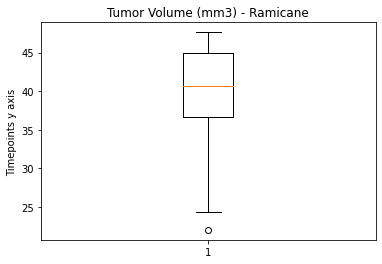

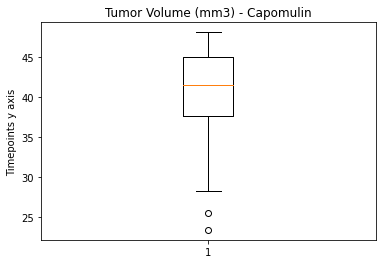

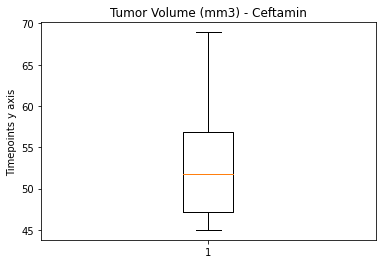

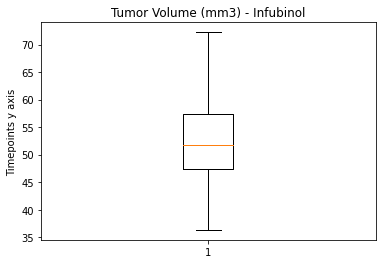

In [182]:
drug_list = summary_table1.index.tolist()
#print(drug_list)
for x in range(len(top4_treatment_regimens)):
    drug_name = top4_treatment_regimens[x]
    #print(drug_name)
    drug_name_df = clean_df.loc[clean_df["Drug Regimen"] == drug_name]
    plot_title = f"{drug_name} - Mice Count vs. Timepoint"
    #print(plot_title)
    filtered_drug_name_df = drug_name_df[['Timepoint', 'Tumor Volume (mm3)']]
#filetered_drug_name_df    
    grouped_filt_drug_name_df = filtered_drug_name_df.groupby('Timepoint')
#grouped_filt_drug_name_df
    mean_grouped_filt_drug_df = grouped_filt_drug_name_df.mean()
#mean_grouped_filt_drug_df    
    renamed_mean_grouped_df = mean_grouped_filt_drug_df.rename(columns={'Tumor Volume (mm3)': (f"Tumor Volume (mm3), {drug_name}")})
#renamed_mean_grouped_df
    # option 2
    tumor_volume = drug_name_df['Tumor Volume (mm3)']
# tumor_volume

    # Create df based one the clean_df using .loc method to extract only the Timepoint == 45, as final tumor volume
    final_tumor_vol_df = drug_name_df.loc[clean_df['Timepoint'] == 45]
    grouped_final_tumor_vol_df = final_tumor_vol_df.groupby('Mouse ID')
#grouped_final_tumor_vol_df    
    mean_grouped_final_drug = grouped_final_tumor_vol_df.mean()
    renamed_mean_grouped_final_df = mean_grouped_final_drug.rename(columns={'Tumor Volume (mm3)': (f"Tumor Volume (mm3), {drug_name}"),
                                                                            'Timepoint': (f"Timepoint, {drug_name}"),
                                                                            'Metastatic Sites': (f"Metastatic Sites, {drug_name}"),
                                                                            'Age_months': (f"Age_months, {drug_name}"),
                                                                            'Weight (g)': (f"Weight (g), {drug_name}")})

#renamed_mean_grouped_final_df
    

    fig1, ax1 = plt.subplots()
    ax1.set_title(f'Tumor Volume (mm3) - {drug_name}')
    ax1.set_ylabel('Timepoints y axis')
    ax1.boxplot(tumor_volume)
    plt.savefig(f"Box_and_Whiskers_plot {drug_name}.png")
    plt.show()

In [183]:
# Note: data input should be an iterable list:
#data_ramicane = 

In [184]:
tumor_vol_ramicane = clean_df.loc[clean_df['Drug Regimen'] == 'Ramicane']
tumor_vol_capomulin = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
tumor_vol_ceftamin = clean_df.loc[clean_df['Drug Regimen'] == 'Ceftamin']
tumor_vol_infubinol = clean_df.loc[clean_df['Drug Regimen'] == 'Infubinol']
# tumor_vol_ramicane_arr_of_lists = []
# for x in range(len(top4_treatment_regimens)):
tumor_vol_ramicane = tumor_vol_ramicane[['Tumor Volume (mm3)']]
tumor_vol_capomulin = tumor_vol_capomulin[['Tumor Volume (mm3)']]
tumor_vol_ceftamin = tumor_vol_ceftamin[['Tumor Volume (mm3)']]
tumor_vol_infubinol = tumor_vol_infubinol[['Tumor Volume (mm3)']]

tumor_vol_ramicane_list = tumor_vol_ramicane['Tumor Volume (mm3)'].tolist()
tumor_vol_capomulin_list = tumor_vol_capomulin['Tumor Volume (mm3)'].tolist()
tumor_vol_ceftamin_list = tumor_vol_ceftamin['Tumor Volume (mm3)'].tolist()
tumor_vol_infubinol_list = tumor_vol_infubinol['Tumor Volume (mm3)'].tolist()


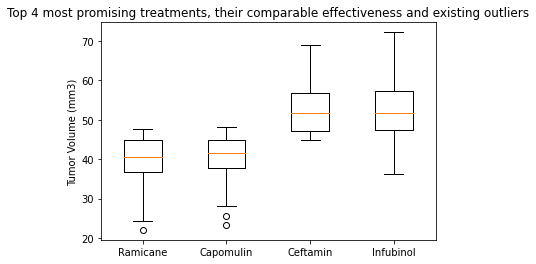

In [185]:
data = [tumor_vol_ramicane_list, tumor_vol_capomulin_list, tumor_vol_ceftamin_list, tumor_vol_infubinol_list]
fig5, ax5 = plt.subplots()
ax5.set_title(f'Top 4 most promising treatments, their comparable effectiveness and existing outliers')
#ax5.set_xlabel("Top 4 most promising treatments")
ax5.set_ylabel('Tumor Volume (mm3)')
ax5.boxplot(data)
labels = ('Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol')
names=("Ramicane","Capomulin","Ceftamin", "Infubinol")
plt.xticks(np.arange(len(labels))+1, labels)
#plt.savefig(f"Box_and_Whiskers_plot Ramicane.png")
plt.show()

In [186]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

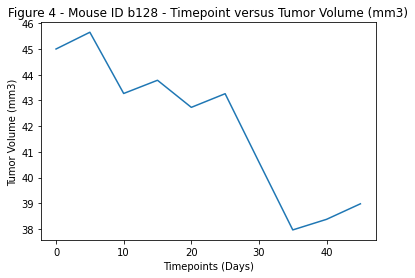

<Figure size 432x288 with 0 Axes>

In [187]:
# Generate a line plot of time point versus tumor volume 
    # for a mouse treated with Capomulin
mouse_treated_with_capomulin = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
mice_capomulin = mouse_treated_with_capomulin[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
unique_mouse = mice_capomulin['Mouse ID'].unique()
#😍👌☺️😊
unique_mouse
# Chose mouse ID b128:
mouse_b128 = mouse_treated_with_capomulin.loc[mouse_treated_with_capomulin['Mouse ID'] == 'b128']
mouse_b128
mouse_b128_filtered = mouse_b128[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
mouse_b128_filtered
mouse_b128_timepoint_list = mouse_b128_filtered['Timepoint'].tolist()
mouse_b128_timepoint_list
mouse_b128_tumvol_list = mouse_b128_filtered['Tumor Volume (mm3)'].tolist()
mouse_b128_tumvol_list
plt.plot(mouse_b128_timepoint_list, mouse_b128_tumvol_list)
plt.xlabel

# plt.legend(bbox_to_anchor=(1.05, 1))
plt.title("Figure 4 - Mouse ID b128 - Timepoint versus Tumor Volume (mm3)")
plt.xlabel("Timepoints (Days)")
plt.ylabel("Tumor Volume (mm3)")
#plt.tight_layout()
plt.show()
plt.savefig("Mouse_id_b128_Timepoint_vs_Tumor_volume.png")


In [188]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# README:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
mouse_b128_cap_df = capomulin_df.loc[capomulin_df['Mouse ID'] == 'b128']
mouse_b128_cap_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22
1268,b128,25,43.262145,1,Capomulin,Female,9,22
1400,b128,30,40.605335,1,Capomulin,Female,9,22
1547,b128,35,37.967644,1,Capomulin,Female,9,22
1629,b128,40,38.379726,2,Capomulin,Female,9,22
1764,b128,45,38.982878,2,Capomulin,Female,9,22


In [189]:
mouse_b128_cap_df2 = mouse_b128_cap_df[['Weight (g)', 'Tumor Volume (mm3)']]
mouse_b128_cap_df2 = mouse_b128_cap_df.groupby('Tumor Volume (mm3)').mean()
mouse_b128_cap_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22
1268,b128,25,43.262145,1,Capomulin,Female,9,22
1400,b128,30,40.605335,1,Capomulin,Female,9,22
1547,b128,35,37.967644,1,Capomulin,Female,9,22
1629,b128,40,38.379726,2,Capomulin,Female,9,22
1764,b128,45,38.982878,2,Capomulin,Female,9,22


In [190]:
weight_b128_cap = mouse_b128_cap_df2['Weight (g)'].tolist()
print(weight_b128_cap)

[22, 22, 22, 22, 22, 22, 22, 22, 22, 22]


In [191]:
# weight_list_capomulin
average_b128_cap_vol = mouse_b128_cap_df['Tumor Volume (mm3)'].tolist()
average_b128_cap_vol

[45.0,
 45.65133131,
 43.2708519,
 43.78489343,
 42.731552,
 43.26214483,
 40.60533486,
 37.96764437,
 38.3797259,
 38.98287774]

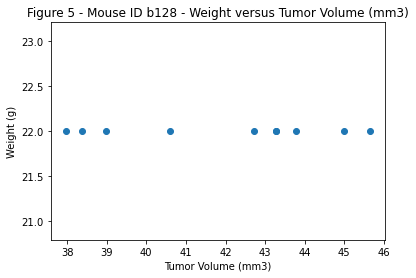

In [192]:
plt.scatter(average_b128_cap_vol, weight_b128_cap)
plt.title("Figure 5 - Mouse ID b128 - Weight versus Tumor Volume (mm3)")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.show()

## Correlation and Regression

In [193]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_df3 = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
mouse_b128_cap_df3 = capomulin_df.loc[capomulin_df['Mouse ID'] == 'b128']
mouse_b128_cap_df3.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22


In [194]:
# Correlation
average_b128_cap_vol

[45.0,
 45.65133131,
 43.2708519,
 43.78489343,
 42.731552,
 43.26214483,
 40.60533486,
 37.96764437,
 38.3797259,
 38.98287774]

In [195]:
weight_b128_cap

[22, 22, 22, 22, 22, 22, 22, 22, 22, 22]

In [196]:
correlation = sts.pearsonr(average_b128_cap_vol, weight_b128_cap)

print(f"Correlation between both factors is {correlation}")

Correlation between both factors is (nan, nan)


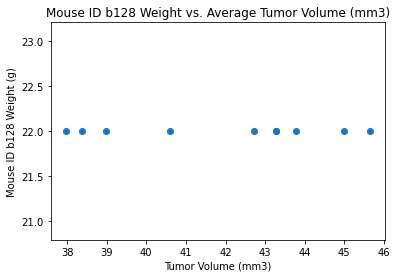

In [197]:
plt.scatter(average_b128_cap_vol, weight_b128_cap)
plt.title("Mouse ID b128 Weight vs. Average Tumor Volume (mm3)")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Mouse ID b128 Weight (g)")
plt.show()

In [198]:
# Attempt #2 - for Correlation step - rerun preparation steps 
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
import os

# filter for warnings:
import warnings
warnings.filterwarnings('ignore')

# File path for the saved plots
file_path = os.path.join("images","")

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')
merged_df.head()

# Checking the number of mice in the DataFrame.
len(merged_df['Mouse ID'].unique())

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse_df = merged_df.loc[merged_df.duplicated(subset=["Mouse ID","Timepoint"]), "Mouse ID"].unique()
duplicated_mouse_df

# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse = merged_df.loc[merged_df["Mouse ID"] == "g989"]
duplicated_mouse

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df["Mouse ID"].isin(duplicated_mouse_df) == False]
clean_df.head()

# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

In [199]:
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [200]:
capomulin_df4 = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
capomulin_df4

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [201]:
mouse_weight_capomulin_df4 = capomulin_df4[['Weight (g)', 'Tumor Volume (mm3)']]
mouse_weight_capomulin_df4

,Weight (g),Tumor Volume (mm3)
0,22,45.000000
226,21,45.000000
227,17,45.000000
228,17,45.000000
229,21,45.000000
...,...,...
1854,23,40.728578
1859,23,38.125164
1878,24,47.685963
1888,25,41.581521


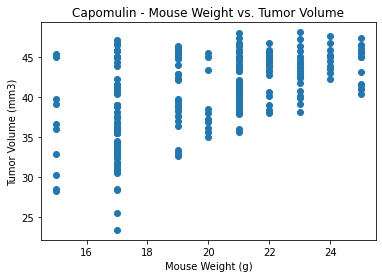

In [202]:
# View in scatter plot before calculating the correlation
plt.scatter(mouse_weight_capomulin_df4.iloc[:,0], mouse_weight_capomulin_df4.iloc[:,1])
plt.title("Capomulin - Mouse Weight vs. Tumor Volume")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [203]:
# Calculate the correlation coefficient - Mouse weight versus Tumor Vol
mouse_weight_capomulin = mouse_weight_capomulin_df4.iloc[:,0]
tumor_vol = mouse_weight_capomulin_df4.iloc[:,1]
correlation4 = sts.pearsonr(mouse_weight_capomulin, tumor_vol)
print(correlation4)

(0.525699555207717, 9.605446629502006e-18)


In [204]:
# Calculate the correlation coefficient - Mouse weight versus 
    # AVERAGE Tumor Vol. To get average(mean()) need to create groupby 
grouped_df5 = mouse_weight_capomulin_df4.groupby('Weight (g)')
mean_grouped_df5 = grouped_df5.mean().reset_index()
mean_grouped_df5

,Weight (g),Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


In [205]:
# Plot Mouse Weight versus AVERAGE Tumor Volume
mouse_weight_capomulin5 = mean_grouped_df5.iloc[:,0]
tumor_vol_average5 = mean_grouped_df5.iloc[:,1]
correlation5 = sts.pearsonr(mouse_weight_capomulin5, tumor_vol_average5)
print(correlation4)

(0.525699555207717, 9.605446629502006e-18)


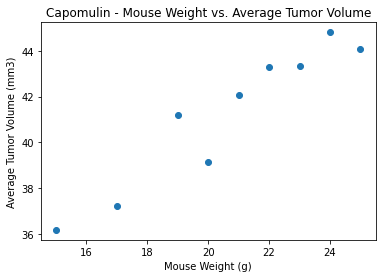

In [206]:
# View in scatter plot before calculating the correlation
plt.scatter(mean_grouped_df5.iloc[:,0], mean_grouped_df5.iloc[:,1])
plt.title("Capomulin - Mouse Weight vs. Average Tumor Volume")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


In [208]:
# Try to use unstack method to get the correlation for mouse_weight_capomulin_df4
#mouse_weight_capomulin_df4
mouse_weight_capomulin_df4 = mouse_weight_capomulin_df4.rename(columns={'Weight (g)': 'Weight',
                                                                        'Tumor Volume (mm3)': 'TumorVolume'})
mouse_weight_capomulin_df4

,Weight,TumorVolume
0,22,45.000000
226,21,45.000000
227,17,45.000000
228,17,45.000000
229,21,45.000000
...,...,...
1854,23,40.728578
1859,23,38.125164
1878,24,47.685963
1888,25,41.581521


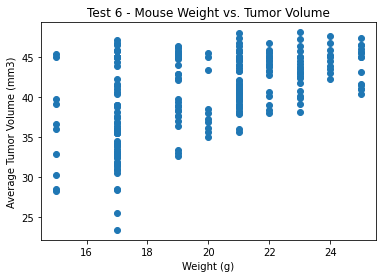

In [209]:
weight6 = mouse_weight_capomulin_df4.Weight
average_tumorvol = mouse_weight_capomulin_df4.TumorVolume
plt.scatter(weight6, average_tumorvol)
plt.title("Test 6 - Mouse Weight vs. Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

In [211]:
round(sts.pearsonr(weight6, average_tumorvol)[0],2)

0.53

In [213]:
mouse_corr = mouse_weight_capomulin_df4.corr()
mouse_corr.unstack().sort_values()

Weight       TumorVolume    0.5257
TumorVolume  Weight         0.5257
Weight       Weight         1.0000
TumorVolume  TumorVolume    1.0000
dtype: float64